<a href="https://colab.research.google.com/github/asim5800/Python-Machine-Learning/blob/master/Clustering_LW_less_than_30K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime as dt
from sklearn.cluster import KMeans
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#installing yellow brick for silhoutte scre visualisation
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Customer Identification/Clustering/colab less 30 cluster (1).csv')

In [5]:
df.head()

,Unnamed: 0,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,...,"working_tenure_bin_(12, 14]","working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]"
0,5,0.0,6000,33,4909,15091.0,0,122.224486,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0.0,13000,49,26526,0.0,0,49.008520,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9,1000.0,7000,28,17470,530.0,0,40.068689,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,0.0,14000,31,25900,0.0,0,54.054054,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0.0,12000,53,17941,0.0,0,66.885904,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

#drpping columns

df.drop(['Unnamed: 0','lead_id'], axis=1, inplace=True)

In [7]:
df.shape


(6631, 5339)

In [10]:
from sklearn.cluster import KMeans

In [11]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [12]:
clean_dataset(df)

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(12, 14]","working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]"
0,0.0,6000.0,33.0,4909.0,15091.0,0.0,122.224486,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,13000.0,49.0,26526.0,0.0,0.0,49.008520,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000.0,7000.0,28.0,17470.0,530.0,0.0,40.068689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14000.0,31.0,25900.0,0.0,0.0,54.054054,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12000.0,53.0,17941.0,0.0,0.0,66.885904,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626,0.0,5000.0,32.0,19837.0,163.0,1.0,25.205424,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6627,2000.0,10000.0,25.0,22193.0,2807.0,1.0,45.059253,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6628,5000.0,10000.0,30.0,29562.0,-7562.0,1.0,33.827211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6629,1000.0,10000.0,35.0,24052.0,2948.0,1.0,41.576584,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x=df

***Elbow method without scaling***

Text(0, 0.5, 'Inertia')

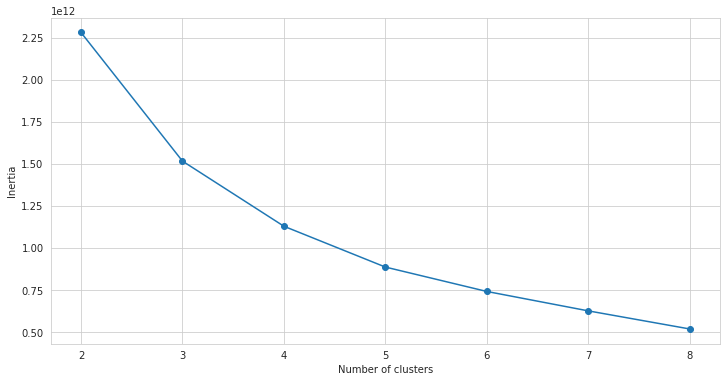

In [14]:
#Without sclaing dataset
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,9):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,9), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Elbow method with min max scaling')
plt.xlabel('Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [15]:
kmeans = KMeans(4)


In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [17]:
df2=df

In [18]:
df2['Clusters'] = identified_clusters 

In [19]:
df2.head()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
0,0.0,6000,33,4909,15091.0,0,122.224486,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,13000,49,26526,0.0,0,49.008520,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,7000,28,17470,530.0,0,40.068689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,14000,31,25900,0.0,0,54.054054,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,12000,53,17941,0.0,0,66.885904,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df2.Clusters.value_counts()

0    6253
3     350
2      18
1      10
Name: Clusters, dtype: int64

In [21]:
#Use silhouette score
range_n_clusters = list (range(2,5))
from sklearn.metrics import silhouette_score

In [22]:
#Use silhouette score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x, preds)
    print("For n_clusters = {}, using without scaling the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, using without scaling the silhouette score is 0.9758427778833266)
For n_clusters = 3, using without scaling the silhouette score is 0.8422038211497772)
For n_clusters = 4, using without scaling the silhouette score is 0.7169167023424453)


***We can observe that for cluster value 4 silhouette score is good as compared to other clusters.***

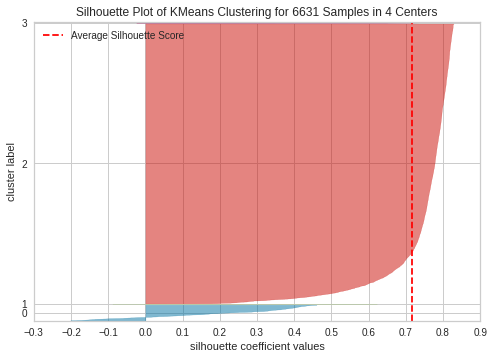

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

***We can see that our cluster size and their respective score***

In [25]:
df.head()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
0,0.0,6000,33,4909,15091.0,0,122.224486,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,13000,49,26526,0.0,0,49.008520,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.0,7000,28,17470,530.0,0,40.068689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,14000,31,25900,0.0,0,54.054054,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,12000,53,17941,0.0,0,66.885904,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.describe()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
count,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.00000,...,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.0,6631.000000,6631.000000
mean,1844.930930,10060.148997,31.842256,21508.049766,5464.520653,0.255919,124.669980,0.619062,0.109184,0.01689,...,0.005278,0.003016,0.000603,0.001960,0.001056,0.000151,0.000151,0.0,0.000151,0.165284
std,7562.401711,4244.800446,6.018511,5322.959995,27979.515587,0.436410,2053.101908,0.485654,0.311894,0.12887,...,0.072465,0.054841,0.024555,0.044237,0.032476,0.012280,0.012280,0.0,0.012280,0.678350
min,0.000000,3000.000000,20.000000,16.000000,-29800.000000,0.000000,12.722646,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,7000.000000,27.000000,17663.000000,0.000000,0.000000,36.396724,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,10000.000000,31.000000,22000.000000,499.000000,0.000000,45.087921,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2600.000000,12000.000000,36.000000,25690.500000,4382.000000,1.000000,53.333333,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,500000.000000,80000.000000,58.000000,29992.000000,870990.000000,1.000000,78947.368421,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.000000


In [32]:
#Importing required modules
 
#from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(df)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
 
#Getting unique labels
u_labels = np.unique(label)


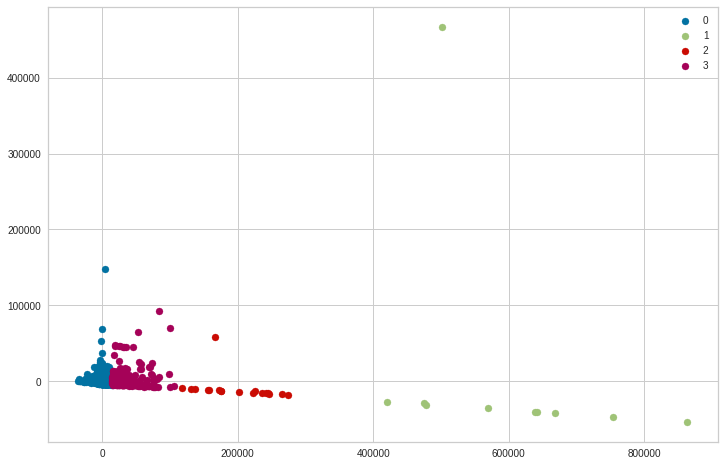

In [35]:
plt.figure(figsize=(12,8)) 
#plotting the results:
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.legend()
#plt.figure(figsize=(12,6))
plt.show()

In [26]:
df.Clusters.value_counts()

0    6253
3     350
2      18
1      10
Name: Clusters, dtype: int64

In [57]:
df.columns

Index(['obligations_by_user', 'loan_recommended', 'age',
       'salary_credit_1_amount', 'diff_bet_actual_n_mention_salary', 'default',
       'loan_to_salary_ration', 'loan_purpose_MEDICAL',
       'loan_purpose_OBLIGATIONS', 'loan_purpose_OCCASION',
       ...
       'working_tenure_bin_(14, 16]', 'working_tenure_bin_(16, 18]',
       'working_tenure_bin_(18, 20]', 'working_tenure_bin_(20, 22]',
       'working_tenure_bin_(22, 24]', 'working_tenure_bin_(24, 26]',
       'working_tenure_bin_(26, 28]', 'working_tenure_bin_(28, 30]',
       'working_tenure_bin_(30, 32]', 'Clusters'],
      dtype='object', length=5340)

In [ ]:
df['sales'] / df.groupby('state')['sales'].transform('sum')

In [44]:
# selecting rows based on condition
df0= df.loc[df["Clusters"] == 0]

In [45]:
df0.describe()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
count,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,...,6253.000000,6253.000000,6253.00000,6253.000000,6253.000000,6253.000000,6253.000000,6253.0,6253.000000,6253.0
mean,1583.046218,9761.450184,31.764593,21677.889813,2120.036055,0.255397,45.717996,0.621941,0.107308,0.016792,...,0.004958,0.003039,0.00048,0.001919,0.001119,0.000160,0.000160,0.0,0.000160,0.0
std,3455.556753,3515.433944,5.976327,5111.846671,4298.810230,0.436119,15.599053,0.484941,0.309530,0.128501,...,0.070241,0.055044,0.02190,0.043769,0.033442,0.012646,0.012646,0.0,0.012646,0.0
min,0.000000,3000.000000,20.000000,2000.000000,-29800.000000,0.000000,12.722646,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,7000.000000,27.000000,17834.000000,0.000000,0.000000,36.138047,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.000000,10000.000000,31.000000,22058.000000,250.000000,0.000000,44.573211,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,2500.000000,12000.000000,35.000000,25750.000000,3238.000000,1.000000,52.539405,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,150000.000000,35000.000000,58.000000,29992.000000,21935.000000,1.000000,301.334481,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [53]:
df0.default.value_counts()

0    4656
1    1597
Name: default, dtype: int64

0    6030
1     223
Name: loan_purpose_PURCHASE, dtype: int64

In [46]:
# selecting rows based on condition
df1= df.loc[df["Clusters"] == 1]

In [47]:
df1.describe()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,...,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,50200.000000,9400.00000,32.300000,20932.100000,605080.900000,0.300000,46.371642,0.600000,0.100000,0.0,...,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,158044.860017,2756.80975,5.334375,3269.806058,142108.641633,0.483046,17.399765,0.516398,0.316228,0.0,...,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,5000.00000,24.000000,15000.000000,427464.000000,0.000000,22.186723,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.000000,8250.00000,30.250000,18461.000000,482541.500000,0.000000,35.490495,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.000000,10000.00000,31.500000,21590.000000,610815.000000,0.000000,43.695493,1.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.000000,10000.00000,33.000000,23634.000000,668377.500000,0.750000,50.878879,1.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,500000.000000,15000.00000,44.000000,25000.000000,870990.000000,1.000000,82.065872,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
df1.default.value_counts()

0    7
1    3
Name: default, dtype: int64

In [48]:
# selecting rows based on condition
df2= df.loc[df["Clusters"] == 2]

In [49]:
df2.describe()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,4000.055556,12972.222222,33.500000,20311.611111,202619.055556,0.222222,176.876655,0.555556,0.055556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,16478.135247,7639.818719,7.122871,7806.929231,49145.535097,0.427793,376.135633,0.511310,0.235702,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,6000.000000,22.000000,2314.000000,122686.000000,0.000000,29.558470,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25%,0.000000,10000.000000,28.250000,17278.500000,163937.750000,0.000000,37.638184,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
50%,0.000000,10000.000000,34.000000,20926.000000,194392.000000,0.000000,48.992938,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,0.000000,14500.000000,37.500000,27391.250000,246158.500000,0.000000,55.296835,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
max,70000.000000,35000.000000,51.000000,29360.000000,280640.000000,1.000000,1296.456353,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [55]:
df2.default.value_counts()

0    14
1     4
Name: default, dtype: int64

In [50]:
# selecting rows based on condition
df3= df.loc[df["Clusters"] == 3]
df3.describe()

,obligations_by_user,loan_recommended,age,salary_credit_1_amount,diff_bet_actual_n_mention_salary,default,loan_to_salary_ration,loan_purpose_MEDICAL,loan_purpose_OBLIGATIONS,loan_purpose_OCCASION,...,"working_tenure_bin_(14, 16]","working_tenure_bin_(16, 18]","working_tenure_bin_(18, 20]","working_tenure_bin_(20, 22]","working_tenure_bin_(22, 24]","working_tenure_bin_(24, 26]","working_tenure_bin_(26, 28]","working_tenure_bin_(28, 30]","working_tenure_bin_(30, 32]",Clusters
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0000,...,350.000000,350.000000,350.000000,350.000000,350.0,350.0,350.0,350.0,350.0,350.0
mean,5031.280000,15265.714286,33.131429,18551.722857,37944.854286,0.265714,1534.755757,0.571429,0.145714,0.0200,...,0.008571,0.002857,0.002857,0.002857,0.0,0.0,0.0,0.0,0.0,3.0
std,11684.384665,9415.251386,6.570306,7585.644836,18366.543336,0.442345,8829.492975,0.495580,0.353325,0.1402,...,0.092316,0.053452,0.053452,0.053452,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,5000.000000,20.000000,16.000000,19080.000000,0.000000,17.843760,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0
25%,0.000000,10000.000000,28.000000,13945.500000,25000.000000,0.000000,46.707957,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0
50%,0.000000,13000.000000,32.000000,20000.000000,30299.000000,0.000000,69.572067,1.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0
75%,5000.000000,20000.000000,38.000000,24544.000000,44975.000000,1.000000,121.371820,1.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0
max,100000.000000,80000.000000,55.000000,29904.000000,110440.000000,1.000000,78947.368421,1.000000,1.000000,1.0000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,3.0


In [56]:
df3.default.value_counts()

0    257
1     93
Name: default, dtype: int64

In [62]:
df.to_csv('cluster final 30k.csv')